# 🚀 Objective: AdaBoost Classifier Implementation
# 💡 Own Code: Python Implementation for Digesting Concept
# 🎯 Purpose: Mastering the Essence of AdaBoost

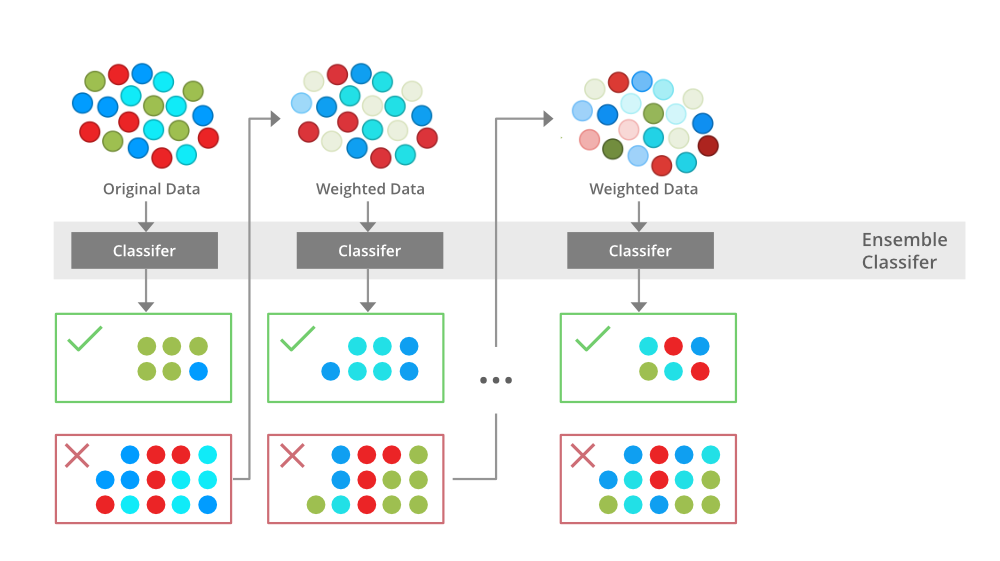

# Ada boost

## Spl - Thanks(Credits)
- https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

- Adaboost is one of the earliest implementations of the boosting algorithm. 

- It forms the base of other boosting algorithms, like gradient boosting and XGBoost.

- AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning.

- It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances


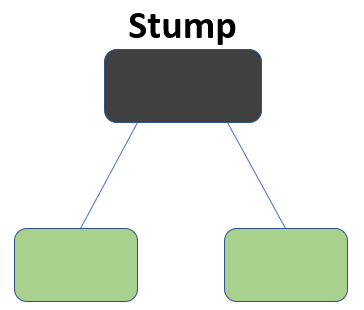

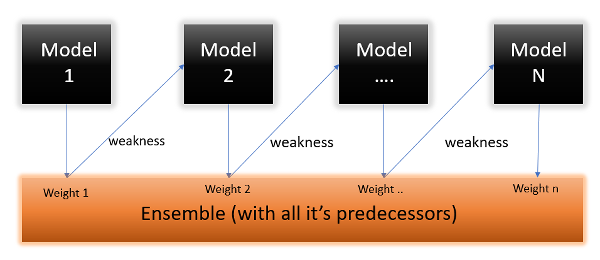

# 1. Import Python Necessay Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

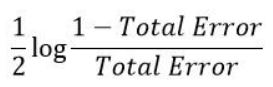

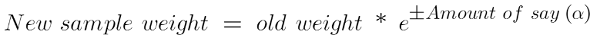

# 2. Write Ada Boost Model for Classification

In [15]:
adaboost_models = []
adaboost_alphas = []

def adaboost_model_classification(X,Y,n_estimators=5):
    n_samples, n_features = X.shape
    
    # step 1: Initial weitgts are equaliy distributes - 1/samples
    weights = np.ones(n_samples) / n_samples

    # step 2: Repeating the process - for n_estimators - squenally decision tree
    for _ in range(n_estimators):
        # step 3: Create the decision tree with depth -1 is called stub
        model = DecisionTreeClassifier(max_depth=1)
        
        # step 4: passing x_train , y_train with weights - called on step1 (first time) else step 8
        model.fit(X, Y, sample_weight=weights)
        
        # step 5: predict the values for x_train
        predictions = model.predict(X)

        # step 6: calcucate the error - using log e - calcuate alpha
        error = np.sum((predictions != Y))/n_samples
        alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
        adaboost_alphas.append(alpha)

        # step 7: update the weights - if it is correct classifited  , sign is negative else positive
        weights *= np.exp(-alpha * Y * predictions)
        
        # step 8: Normalize the weights
        weights /= np.sum(weights)

        adaboost_models.append(model)
        
def adaboost_model_classification_predict(X):
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)
    test_result = []
    for i in range(n_samples):
        x=X.iloc[i]
        for alpha, model in zip(adaboost_alphas, adaboost_models):
            predictions += alpha * model.predict(x)
        print(predictions)
        test_result.append(np.sign(predictions))
    return test_result

# 3. Invoke - Call - Ada Boost - Model- Verification

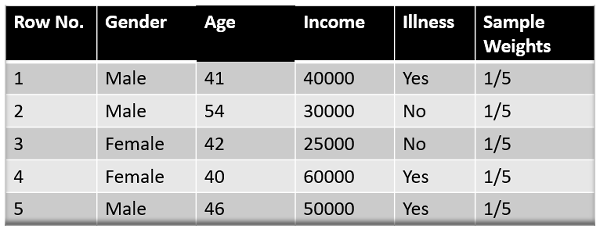

In [16]:
# Create a list of lists containing the data
data = {
    "Gender": [1, 1, 0, 0, 1],
    "Age": [41, 54, 42, 40, 46],
    "Income":[40000, 30000, 25000, 60000, 50000],
    "Illness":[1, 0, 0, 1, 1]
}
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

X=df.drop('Illness',axis=1)
Y=df["Illness"]

adaboost_model_classification(X,Y,n_estimators=5)

# Make predictions on the testing set
y_pred = adaboost_model_classification_predict(X)

# Calculate the accuracy
accuracy = accuracy_score(Y, y_pred)
print("Accuracy:", accuracy)

print("Y Predicted")
print(y_pred)
print()
print("Y Actual")
print(list(Y))

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.